# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [ ]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
from sklearn.utils import shuffle
import random

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### One-hot-encode your labels here

In [ ]:
print ('label shape: ',np.shape(y_train),np.shape(y_test))
def encode(y):
    return to_categorical(y,num_classes=10)
original_y=y_train
y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))

label shape:  (60000,) (10000,)
label shape:  (60000, 10) (10000, 10)


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
class Model:
  def __init__(self):
    self.model=Sequential()
    self.add_layers()
    self.compile()
  def add_layers(self):
    #hidden layers:
    self.model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu",padding="same", input_shape=(28,28,1)))
    self.model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu",padding="same"))
    self.model.add(Conv2D(filters=64, kernel_size = (3,3),padding="same", activation="relu"))
    self.model.add(Conv2D(filters=64, kernel_size = (3,3), padding="same",activation="relu"))
    self.model.add(Flatten())
    self.model.add(Dense(10,activation="softmax"))
  def compile(self):
    self.model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
  def set_early_stopping(self,monitor_value):
    self.early_stopping = EarlyStopping(monitor=monitor_value, patience=10, verbose=0, mode='min')
  def set_hyper_parameters(self,epochs,batch_size):
    self.epochs=epochs
    self.batch_size=batch_size
  def train(self,x_train,y_train,x_test,y_test):
    self.histories=self.model.fit(x_train, y_train, epochs=15, batch_size=128, callbacks=[self.early_stopping],validation_data=(x_test,y_test))
  def summary(self):
    return self.model.summary()
  def show_results(self):
    #displaying the results
    plt.plot(self.histories.history['accuracy'],label = "Train Accuracy")
    plt.plot(self.histories.history['val_accuracy'],label="Test accuracy")
    plt.plot(self.histories.history['val_loss'],label="Test loss")
    plt.plot(self.histories.history['loss'],label="Train Loss")
    plt.title('Model results')
    plt.ylabel('Percentage')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

In [ ]:
#creating the model
cnn=Model()

In [ ]:
#showing the parameters and the different layers
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                501770    
                                                                 
Total params: 613,194
Trainable params: 613,194
Non-tr

In [ ]:
cnn.set_hyper_parameters(epochs=15,batch_size=128)
cnn.set_early_stopping('val_loss')

Epoch 1/15
469/469 [==============================] - 21s 24ms/step - loss: 0.6865 - accuracy: 0.8040 - val_loss: 0.3064 - val_accuracy: 0.9126
Epoch 2/15
469/469 [==============================] - 11s 24ms/step - loss: 0.2956 - accuracy: 0.9144 - val_loss: 0.2437 - val_accuracy: 0.9314
Epoch 3/15
469/469 [==============================] - 11s 24ms/step - loss: 0.1883 - accuracy: 0.9459 - val_loss: 0.1304 - val_accuracy: 0.9630
Epoch 4/15
469/469 [==============================] - 11s 23ms/step - loss: 0.1148 - accuracy: 0.9664 - val_loss: 0.0873 - val_accuracy: 0.9746
Epoch 5/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0887 - accuracy: 0.9737 - val_loss: 0.0762 - val_accuracy: 0.9756
Epoch 6/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0749 - accuracy: 0.9771 - val_loss: 0.0613 - val_accuracy: 0.9802
Epoch 7/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0665 - accuracy: 0.9801 - val_loss: 0.0602 - val_accuracy:

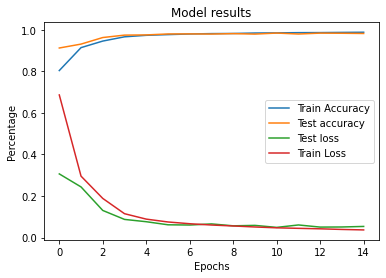

In [ ]:
cnn.train(x_train,y_train,x_test,y_test)
cnn.show_results()

## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


In [ ]:
experiment=[0.2,0.4,0.6,0.8,1]
for perc in experiment:
  print()
  print("Training labels randomizing for:{}% noise".format(perc*100))
  results = []
  y_rand=original_y
  b=int(perc*y_train.shape[0])
  print(b)
  for i in range(b):
    results.append(random.randint(0, y_train.shape[0]-1))
  for j in results:
    y_rand[j]=random.randint(0, 9)
  y_rand=encode(y_rand)
  print(y_rand.shape)
  cnn.train(x_train,y_rand,x_test,y_test)
  cnn.show_results()


Training labels randomizing for:20.0% noise
12000
(60000, 10)
Epoch 1/15
469/469 [==============================] - 11s 24ms/step - loss: 0.9769 - accuracy: 0.8145 - val_loss: 0.3738 - val_accuracy: 0.9736
Epoch 2/15
469/469 [==============================] - 11s 24ms/step - loss: 0.9241 - accuracy: 0.8190 - val_loss: 0.3123 - val_accuracy: 0.9778
Epoch 3/15
469/469 [==============================] - 11s 23ms/step - loss: 0.9101 - accuracy: 0.8201 - val_loss: 0.2727 - val_accuracy: 0.9779
Epoch 4/15
469/469 [==============================] - 11s 23ms/step - loss: 0.9002 - accuracy: 0.8210 - val_loss: 0.2640 - val_accuracy: 0.9788
Epoch 5/15
469/469 [==============================] - 11s 23ms/step - loss: 0.8925 - accuracy: 0.8216 - val_loss: 0.2633 - val_accuracy: 0.9791
Epoch 6/15
469/469 [==============================] - 11s 23ms/step - loss: 0.8850 - accuracy: 0.8220 - val_loss: 0.2728 - val_accuracy: 0.9802
Epoch 7/15
469/469 [==============================] - 11s 23ms/step - los